## Import Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
y = np.array(df['label'])
y

array([1, 0, 1, ..., 7, 6, 9])

In [5]:
df.pop('label')

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [6]:
X = df

In [7]:
X = np.array(X)

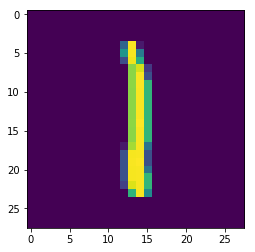

In [8]:
_ = X[1000]
_image = _.reshape(28,28)
plt.imshow(_image)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Using Logistic Regression

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression(solver='sag', multi_class='multinomial')

In [13]:
clf.fit(X_train, y_train)

/home/jatin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
accuracy_score(pred, y_test)

0.9085714285714286

In [18]:
confusion_matrix(pred, y_test)

array([[789,   1,   4,   3,   3,   7,   5,   1,   5,   5],
       [  0, 904,   9,   4,   0,   4,   2,   2,  16,   1],
       [  7,   5, 720,  29,   7,   6,  17,  11,   7,   2],
       [  4,   7,  12, 784,   1,  22,   2,   2,  28,  12],
       [  3,   1,   5,   0, 727,   9,   9,   7,   2,  23],
       [  7,   3,   5,  36,   1, 655,  17,   2,  25,   8],
       [  6,   1,   6,   4,   8,  10, 768,   1,   2,   0],
       [  2,   6,  14,   7,   6,   2,   1, 787,   3,  29],
       [  9,   9,  20,  26,   9,  26,   2,   4, 747,   9],
       [  2,   2,   7,  17,  36,  13,   0,  38,  15, 751]])

In [19]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.96      0.95      0.96       829
          1       0.96      0.96      0.96       939
          2       0.89      0.90      0.89       802
          3       0.90      0.86      0.88       910
          4       0.92      0.91      0.92       798
          5       0.86      0.87      0.87       754
          6       0.95      0.93      0.94       823
          7       0.92      0.92      0.92       855
          8       0.87      0.88      0.87       850
          9       0.85      0.89      0.87       840

avg / total       0.91      0.91      0.91      8400



## Using Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier

In [87]:
clf = BaggingClassifier(n_estimators=40)

In [88]:
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [89]:
pred = clf.predict(X_test)

In [90]:
accuracy_score(pred, y_test)

0.9417857142857143

In [91]:
accuracy_score(clf.predict(X_train), y_train)

0.9998511904761904

In [92]:
confusion_matrix(y_test, pred)

array([[806,   1,   1,   3,   2,   6,   1,   1,   4,   4],
       [  0, 921,   4,   6,   1,   1,   1,   2,   2,   1],
       [  6,   5, 765,   1,   3,   0,   3,   7,  10,   2],
       [  4,   1,  28, 827,   2,  12,   1,   7,  18,  10],
       [  0,   0,   3,   0, 749,   3,   6,   2,   3,  32],
       [  5,   3,   1,  17,   7, 699,   7,   1,   5,   9],
       [  3,   2,   5,   0,   8,  10, 789,   1,   5,   0],
       [  0,   5,   6,   3,   4,   0,   0, 823,   1,  13],
       [  2,  12,   9,  15,   5,  16,   7,   6, 761,  17],
       [  7,   1,   6,   9,  16,   9,   2,  15,   4, 771]])

In [93]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       829
          1       0.97      0.98      0.97       939
          2       0.92      0.95      0.94       802
          3       0.94      0.91      0.92       910
          4       0.94      0.94      0.94       798
          5       0.92      0.93      0.93       754
          6       0.97      0.96      0.96       823
          7       0.95      0.96      0.96       855
          8       0.94      0.90      0.92       850
          9       0.90      0.92      0.91       840

avg / total       0.94      0.94      0.94      8400



## Evaluation function

In [55]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))


## Evaluate the model 

In [57]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result : 

Accuracy Score 0.9999

Classification Report : 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3303
          1       1.00      1.00      1.00      3745
          2       1.00      1.00      1.00      3375
          3       1.00      1.00      1.00      3441
          4       1.00      1.00      1.00      3274
          5       1.00      1.00      1.00      3041
          6       1.00      1.00      1.00      3314
          7       1.00      1.00      1.00      3546
          8       1.00      1.00      1.00      3213
          9       1.00      1.00      1.00      3348

avg / total       1.00      1.00      1.00     33600
 

Confusion Metrics : 
 [[3303    0    0    0    0    0    0    0    0    0]
 [   0 3745    0    0    0    0    0    0    0    0]
 [   0    0 3375    0    0    0    0    0    0    0]
 [   0    0    0 3441    0    0    0    0    0    0]
 [   1    0    0    0 3273    0    0    0    0    0]
 [   1